In [1]:
#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#import PdfPages to save to pdf
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns

In [2]:
# Reading from a csv file, into a data frame
data=pd.read_csv("bikedata.csv")

In [3]:
# Print the first 5 rows
data.head(5)

,number,contract_name,name,bike_stands,available_bike_stands,available_bikes,status,last_update
0,42,dublin,SMITHFIELD NORTH,30,24,6,OPEN,2020-03-04 09:38:19
1,30,dublin,PARNELL SQUARE NORTH,20,19,1,OPEN,2020-03-04 09:30:14
2,54,dublin,CLONMEL STREET,33,14,19,OPEN,2020-03-04 09:39:15
3,108,dublin,AVONDALE ROAD,40,40,0,OPEN,2020-03-04 09:36:45
4,56,dublin,MOUNT STREET LOWER,40,18,21,OPEN,2020-03-04 09:39:33


In [4]:
# Print the last 5 rows
data.tail(5)

,number,contract_name,name,bike_stands,available_bike_stands,available_bikes,status,last_update
524018,100,dublin,HEUSTON BRIDGE (SOUTH),25,9,16,OPEN,2020-03-21 17:16:30
524019,24,dublin,CATHAL BRUGHA STREET,20,13,7,OPEN,2020-03-21 17:14:13
524020,64,dublin,SANDWITH STREET,40,29,11,OPEN,2020-03-21 17:16:04
524021,109,dublin,BUCKINGHAM STREET LOWER,29,25,4,OPEN,2020-03-21 17:14:40
524022,85,dublin,ROTHE ABBEY,35,10,25,OPEN,2020-03-21 17:10:34


In [5]:
#Droping duplicate rows and columns
data=data.T.drop_duplicates().T

data.shape

(524023, 8)

In [6]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = data.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [7]:
data=data.drop_duplicates()

In [8]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', data.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', data[data.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [9]:
# checking how many null values in the data set
data.isnull().sum()

number                   0
contract_name            0
name                     0
bike_stands              0
available_bike_stands    0
available_bikes          0
status                   0
last_update              0
dtype: int64

In [10]:
#convert the dateTime to get rid of the am and pm
def date(x):
    formats = pd.to_datetime(x, errors='coerce')
    return formats

data['last_update'] = data['last_update'].apply(date)


In [11]:
# Convert the category features
data['status'] = data['status'].astype('category')


In [12]:
# Convert the numeric features
data['available_bikes'] = data['available_bikes'].astype('int64')
data['available_bike_stands'] = data['available_bike_stands'].astype('int64')
data['bike_stands'] = data['bike_stands'].astype('int64')


In [13]:
data.dtypes

number                           object
contract_name                    object
name                             object
bike_stands                       int64
available_bike_stands             int64
available_bikes                   int64
status                         category
last_update              datetime64[ns]
dtype: object

In [14]:
#Prepare a table with descriptive statistics for all the continuous features.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bike_stands,307067.0,32.096647,7.663767,16.0,29.0,30.0,40.0,40.0
available_bike_stands,307067.0,19.924743,10.803479,0.0,12.0,20.0,28.0,40.0
available_bikes,307067.0,12.100535,9.592475,0.0,4.0,10.0,18.0,40.0


In [15]:
# Descriptive statistics for all the categorical features
data.select_dtypes(['category']).describe().T

,count,unique,top,freq
status,307067,1,OPEN,307067


### Data Quality Report: Visualisations

C:\Users\olawa\Anaconda3\envs\comp47350py37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\olawa\Anaconda3\envs\comp47350py37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\olawa\Anaconda3\envs\comp47350py37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users

<Figure size 432x288 with 0 Axes>

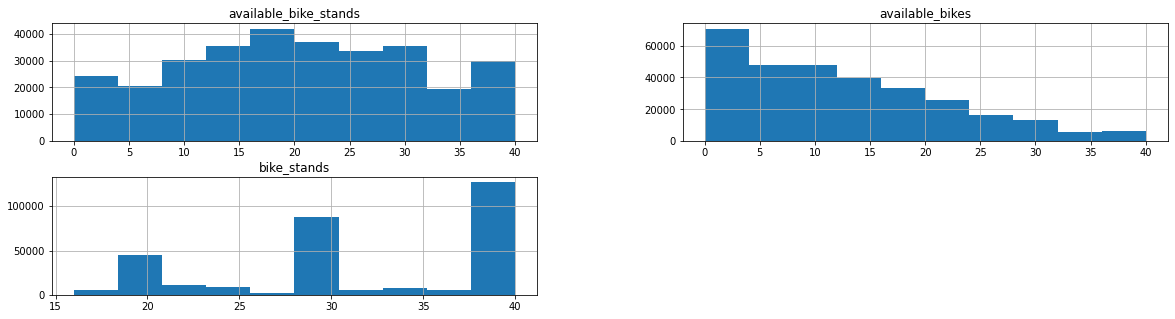

In [16]:
# Plot histograms for all the continuous features.
#To list many plot together 
%matplotlib inline

plt.figure()
data.hist(figsize=(20, 5))
plt.savefig('continuous_histograms.png')

C:\Users\olawa\Anaconda3\envs\comp47350py37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\olawa\Anaconda3\envs\comp47350py37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\olawa\Anaconda3\envs\comp47350py37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users

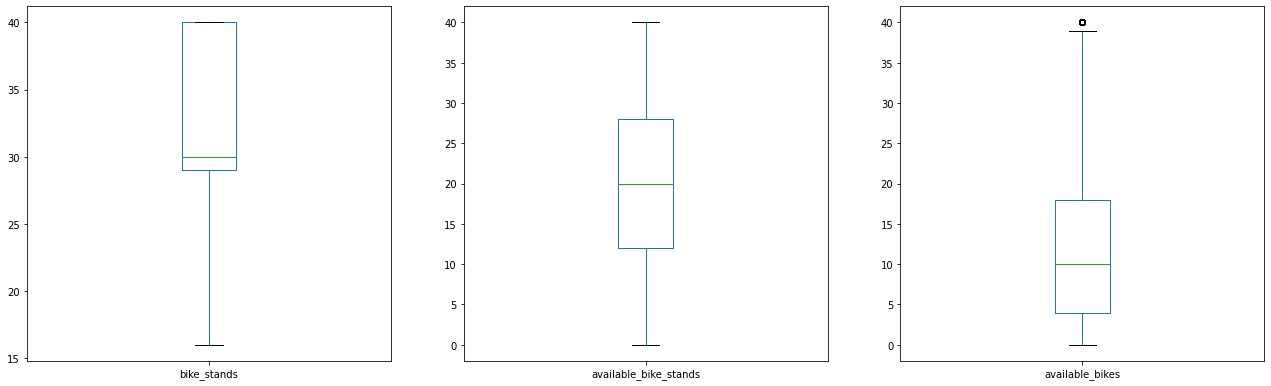

In [17]:
continuous_columns = data.select_dtypes(['int64']).columns
pp = PdfPages("continuous_features.pdf")
pp=data[continuous_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(4,4), sharex=False, sharey=False)
plt.savefig('continuous_features.png')

In [18]:
#Save df to new csv file
data.to_csv('updated_bikedata.csv')

In [19]:
data.head()

,number,contract_name,name,bike_stands,available_bike_stands,available_bikes,status,last_update
0,42,dublin,SMITHFIELD NORTH,30,24,6,OPEN,2020-03-04 09:38:19
1,30,dublin,PARNELL SQUARE NORTH,20,19,1,OPEN,2020-03-04 09:30:14
2,54,dublin,CLONMEL STREET,33,14,19,OPEN,2020-03-04 09:39:15
3,108,dublin,AVONDALE ROAD,40,40,0,OPEN,2020-03-04 09:36:45
4,56,dublin,MOUNT STREET LOWER,40,18,21,OPEN,2020-03-04 09:39:33
